In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import r2_score


filepath_orchid = 'C:/SandBox/Prosperity/data/raw/prices_round_2_day_1.csv'
filepath_bots = 'C:/SandBox/Prosperity/second-round/daksh-work/botData.csv'

ORCHIDS = 'ORCHIDS'
AMETHYSTS = 'AMETHYSTS'
STARFRUIT = 'STARFRUIT'

In [3]:
orchid_observation = pd.read_csv(filepath_orchid, delimiter=';')
bot_market = pd.read_csv(filepath_bots, delimiter=';')

orchid_observation.head()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1
1,100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1
2,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1
3,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1
4,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1


In [4]:
orchid_market = bot_market[bot_market['product'] == ORCHIDS]
amethyst_market = bot_market[bot_market['product'] == AMETHYSTS]
starfruit_market = bot_market[bot_market['product'] == STARFRUIT]
orchid_market.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,1,0,ORCHIDS,1094,10,1093.0,3.0,1086.0,41.0,1102,10,1104.0,3.0,1111.0,41.0,1098.0,0.0
4,1,100,ORCHIDS,1094,6,1093.0,2.0,1087.0,51.0,1102,6,1103.0,2.0,1110.0,51.0,1098.0,0.0
7,1,200,ORCHIDS,1093,6,1092.0,3.0,1085.0,49.0,1101,6,1102.0,3.0,1108.0,49.0,1097.0,0.0
11,1,300,ORCHIDS,1093,10,1092.0,4.0,1085.0,52.0,1101,10,1102.0,4.0,1109.0,52.0,1097.0,0.0
13,1,400,ORCHIDS,1093,10,1092.0,3.0,1086.0,51.0,1101,10,1102.0,3.0,1109.0,51.0,1097.0,0.0


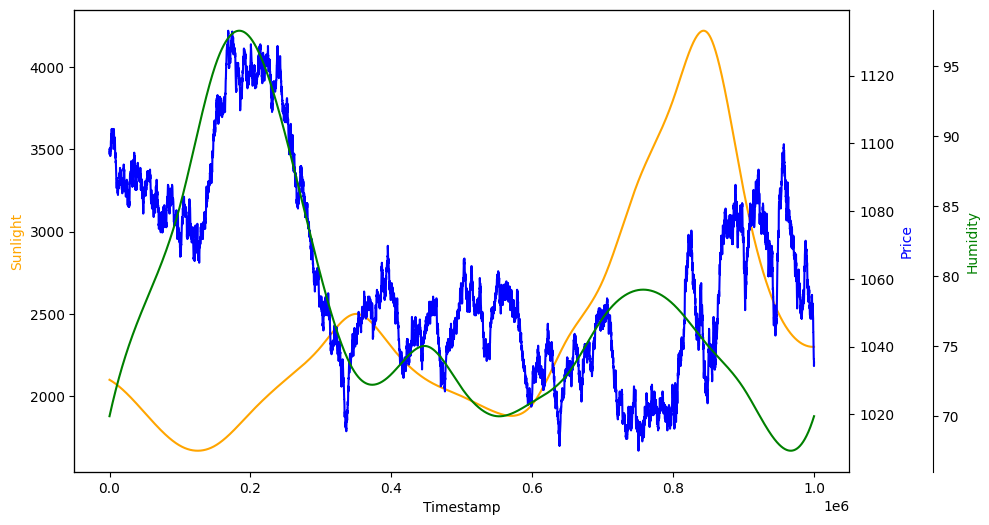

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot sunlight
ax1.plot(orchid_observation['timestamp'], orchid_observation['SUNLIGHT'], color='orange')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Sunlight', color='orange')

# Create a second axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot price
ax2.plot(orchid_observation['timestamp'], orchid_observation['ORCHIDS'], color='blue')
ax2.set_ylabel('Price', color='blue')

# Create a third axis sharing the same x-axis
ax3 = ax1.twinx()

# Plot humidity
ax3.plot(orchid_observation['timestamp'], orchid_observation['HUMIDITY'], color='green')
ax3.set_ylabel('Humidity', color='green')

# Adjust the position of the third axis
ax3.spines['right'].set_position(('outward', 60))

# Show the plot
plt.show()



(1050.0, 1120.0)

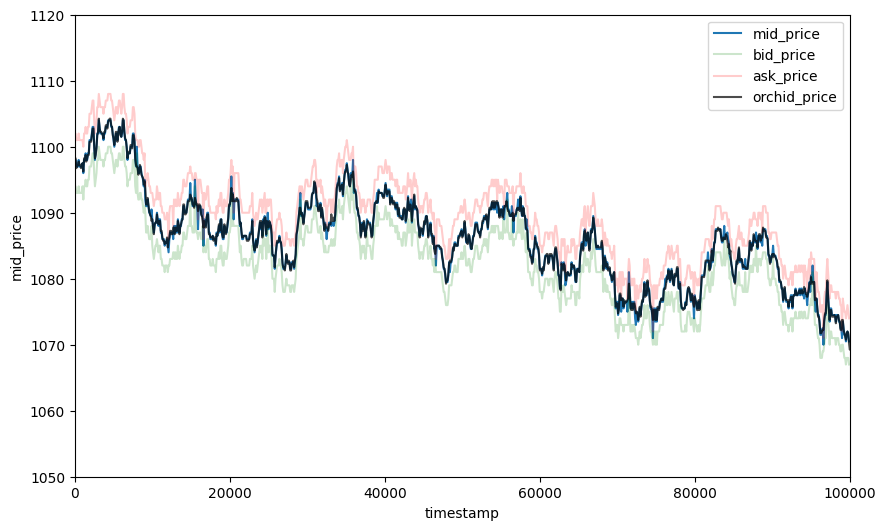

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(data = orchid_market, x='timestamp', y='mid_price', label = 'mid_price' )
sns.lineplot(data = orchid_market, x='timestamp', y='bid_price_1', label = 'bid_price', alpha = 0.2, color = 'green')
sns.lineplot(data = orchid_market, x='timestamp', y='ask_price_1', label = 'ask_price', alpha = 0.2 , color = 'red')
sns.lineplot(data = orchid_observation, x='timestamp', y=ORCHIDS, label = 'orchid_price', color = 'black', alpha = 0.7)
plt.xlim(0, 1e5)
plt.ylim(1050, 1120)

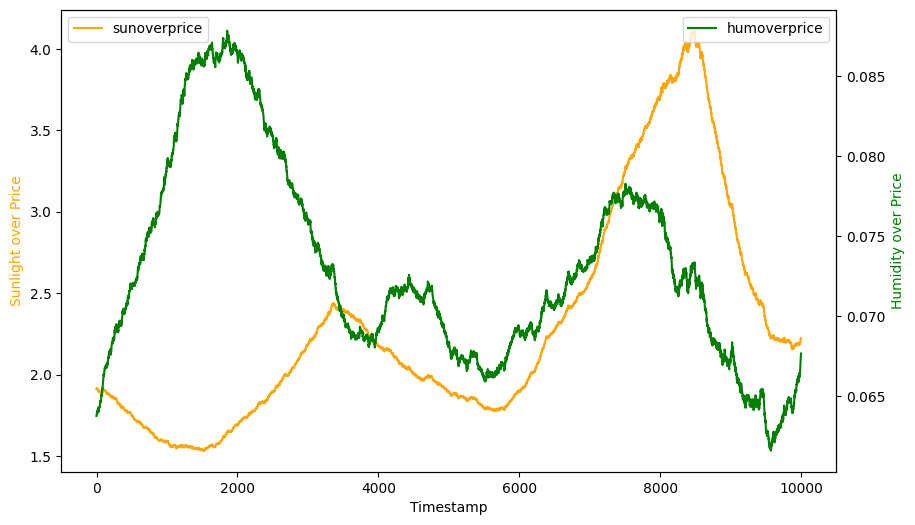

In [7]:
sunoverprice = orchid_observation['SUNLIGHT'] / orchid_observation[ORCHIDS]
humoverprice = orchid_observation['HUMIDITY'] / orchid_observation[ORCHIDS]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot sunoverprice
sns.lineplot(data=sunoverprice, label='sunoverprice', ax=ax1, color='orange')

# Set the labels for the first axis
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Sunlight over Price', color='orange')

# Create a second axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot humoverprice
sns.lineplot(data=humoverprice, label='humoverprice', ax=ax2, color='green')

# Set the labels for the second axis
ax2.set_ylabel('Humidity over Price', color='green')

# Show the plot
plt.show()

# plt.figure(figsize=(10, 6))
# sns.lineplot(data = sunoverprice, label = 'sunoverprice')
# sns.lineplot(data = humoverprice, label = 'humoverprice')


Skewness: -0.025560453637845513


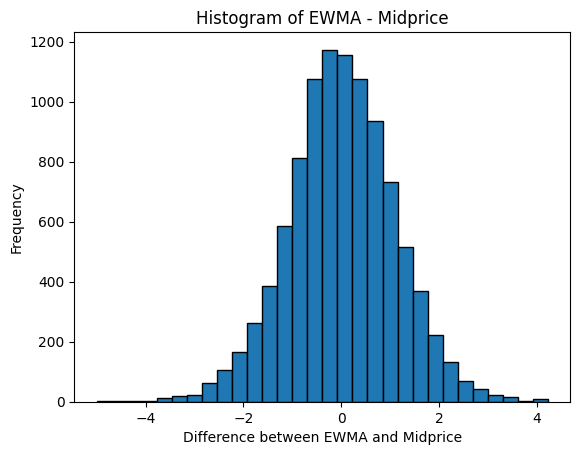

In [8]:
# First I need to create an array of features

# X = (x1, x2, x3, x4).T where x1 is a set of data at t = 1
# Y = (y1, y2, y3, y4).T where y1 is a future price - ewma of the price at t = 1

# No, first lets pick an ewma

orchid_observation['ewma'] = orchid_observation[ORCHIDS].ewm(alpha=0.3, adjust=False).mean()

# import matplotlib.pyplot as plt

# Calculate the difference between EWMA and midprice
ewma_midprice_diff = orchid_observation['ewma'] - orchid_observation['ORCHIDS']

# Plot the histogram
plt.hist(ewma_midprice_diff, bins=30, edgecolor='black')

# Set the labels and title
plt.xlabel('Difference between EWMA and Midprice')
plt.ylabel('Frequency')
plt.title('Histogram of EWMA - Midprice')



# data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# print(ewma_midprice_diff)


# std = np.std(ewma_midprice_diff)
skewness = stats.skew(ewma_midprice_diff)
print("Skewness:", skewness)


# Show the plot
plt.show()


# plt.figure(figsize=(10, 6))
# plt.plot(orchid_observation['timestamp'], orchid_observation[ORCHIDS], color='red')
# plt.plot(orchid_observation['timestamp'], orchid_observation['ewma'], color='blue')
# plt.xlim(0, 200000)
# plt.show()

In [9]:
# Now i create an array of features
Y = []
X = []
lookback = 25
gap_distance = 5
for i in range(lookback, len(orchid_observation.SUNLIGHT)-1):
    Y.append(orchid_observation[ORCHIDS].iloc[i+1] - orchid_observation['ewma'].iloc[i])
    X.append(np.concatenate([orchid_observation['SUNLIGHT'].iloc[i-lookback : i:gap_distance].values,  orchid_observation['HUMIDITY'].iloc[i-lookback: i:gap_distance].values]))

X = np.array(X)
Y = np.array(Y)
# print(np.array(X))

X = X - X.mean(axis=0)
X = X / X.std(axis=0)

Y = Y - Y.mean()
Y = Y / Y.std()

In [10]:
train_size = int(0.8 * len(X))
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]

In [11]:
orchid_observation.head()
# orchid_observation.SUNLIGHT.iloc[0:1].values

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,ewma
0,0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1,1098.250
1,100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1,1098.250
2,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1,1097.800
3,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1,1097.560
4,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1,1097.467


In [12]:
# compare two decimals
# abs(x - y) < 1e-8

[-258.35563713  141.18521102  255.41573422  100.66506412 -238.89959747
   -9.44480066  -49.52792641   50.45442892   78.39054232  -69.85938332]
[-244.4789402   128.24868045  243.3497165   108.1864409  -235.29460714
  -24.39317958  -15.41047546   44.05073011   48.66591719  -52.89985816]
[-234.41829063  121.28113292  233.81882613  107.98806912 -228.65797483
  -28.35221942   -4.53934015   40.89043502   38.23565156  -46.22114146]
[-225.69073817  115.86602659  225.54216879  105.95070629 -221.65596268
  -29.64070495    0.54824827   38.62470663   32.68325174  -42.20188305]
[-217.83148684  111.41761406  217.71814369  103.57626128 -214.86792295
  -29.91793648    3.34963238   36.77437336   29.11217242  -39.30440623]
[-210.58257476  107.38312839  210.64239412  100.90039909 -208.33035578
  -29.7313215     5.02869934   35.17337737   26.55257433  -37.00929187]
[-203.86542121  103.77052231  203.97860249   98.25800075 -202.12835539
  -29.31099837    6.0821484    33.74605658   24.58634027  -35.08932019]

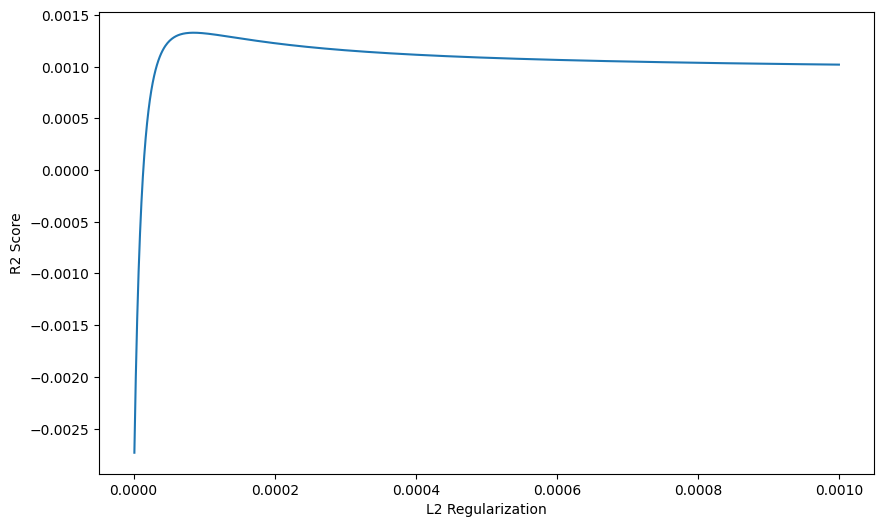

In [13]:
l2_regs = np.linspace(1e-6, 1e-3, 1000)
scores = []
for l2_reg in l2_regs:
    W = np.linalg.inv(np.dot(np.transpose(X_train), X_train) + l2_reg * np.identity(X_train.shape[1])).dot(np.dot(np.transpose(X_train), Y_train))
    if l2_reg < 1e-5:
     print(W)
    y_pred = np.dot(X_test, W)
    # print(l2_reg, r2_score(Y_test, y_pred))
    scores.append(r2_score(Y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(l2_regs, scores)
plt.xlabel('L2 Regularization')
plt.ylabel('R2 Score')
plt.show()

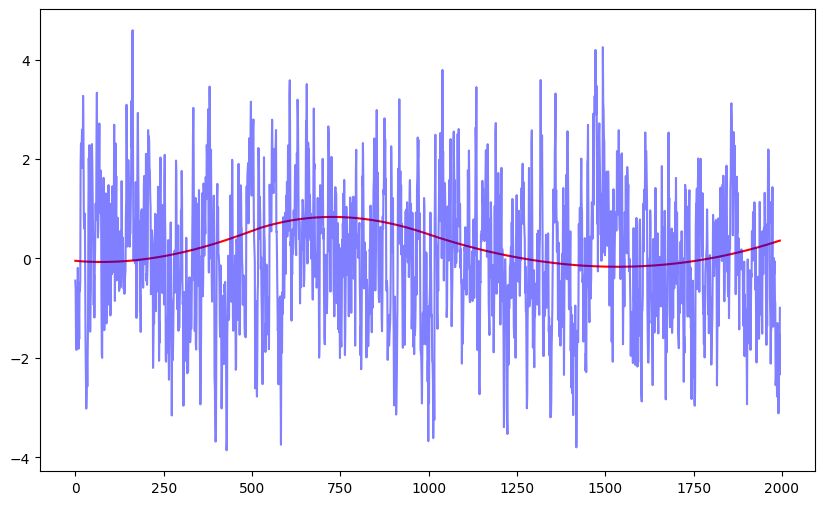

In [14]:
y_pred = np.dot(X_test, W)
plt.figure(figsize=(10, 6))
plt.plot(y_pred*10, color='red')
plt.plot(Y_test, color='blue', alpha = 0.5)

In [15]:
# price_pred = y_pred + orchid_observation['ewma'].iloc[lookback+1:]
# plt.figure(figsize=(10, 6))
# plt.plot(price_pred, color='red', label='Predicted Price')
# plt.plot(orchid_observation[ORCHIDS].iloc[lookback+1:], color='blue', alpha = 0.5)


In [26]:
print(r2_score(Y_test, [0 for i in range(len(Y_test))]))

-0.00040386938506409287


In [27]:
print(r2_score(Y_test, y_pred))

0.0010201844223832746


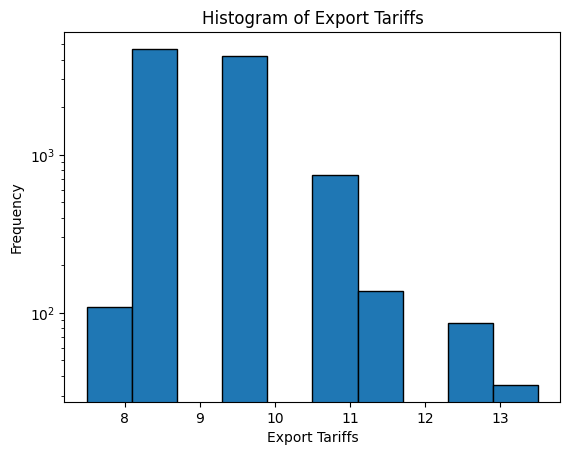

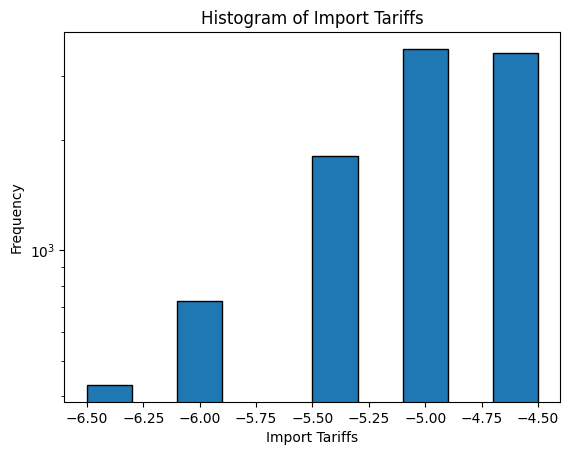

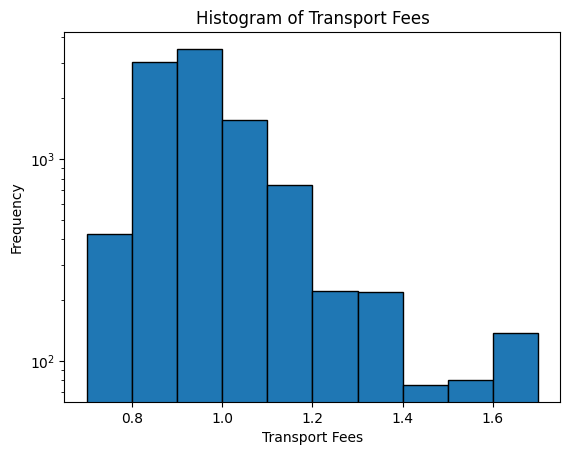

In [17]:
# Extract the export tariffs from the orchid_observations dataset

# Plot the histogram
plt.hist(orchid_observation['EXPORT_TARIFF'], bins=10, edgecolor='black', log=True)

# Add labels and title
plt.xlabel('Export Tariffs')
plt.ylabel('Frequency')
plt.title('Histogram of Export Tariffs')
# Show the plot
plt.show()


plt.hist(orchid_observation['IMPORT_TARIFF'], bins=10, edgecolor='black', log=True)
plt.xlabel('Import Tariffs')
plt.ylabel('Frequency')
plt.title('Histogram of Import Tariffs')
plt.show()

plt.hist(orchid_observation['TRANSPORT_FEES'], bins=10, edgecolor='black', log=True)
plt.xlabel('Transport Fees')
plt.ylabel('Frequency')
plt.title('Histogram of Transport Fees')
plt.show()

In [21]:
filepath_orchid_m1 = 'C:/SandBox/Prosperity/data/raw/prices_round_2_day_-1.csv'
filepath_orchid_0 = 'C:/SandBox/Prosperity/data/raw/prices_round_2_day_0.csv'
filepath_orchid_1 = 'C:/SandBox/Prosperity/data/raw/prices_round_2_day_1.csv'

paths = [filepath_orchid_m1, filepath_orchid_0, filepath_orchid_1]
totaldf = pd.DataFrame()

df1 = pd.read_csv(filepath_orchid_m1, delimiter=';')
df2 = pd.read_csv(filepath_orchid_0, delimiter=';')
df3 = pd.read_csv(filepath_orchid_1, delimiter=';')

# for path in paths:
#     df = pd.read_csv(path, delimiter=';')
#     totaldf = pd.concat([totaldf, df])

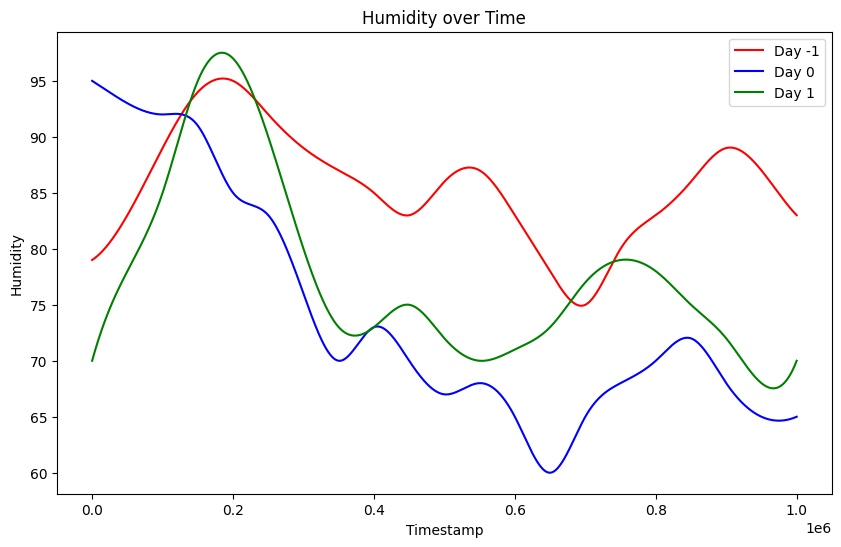

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df1['timestamp'], df1['HUMIDITY'], color='red', label='Day -1')
plt.plot(df2['timestamp'], df2['HUMIDITY'], color='blue', label='Day 0')
plt.plot(df3['timestamp'], df3['HUMIDITY'], color='green', label='Day 1')
plt.xlabel('Timestamp')
plt.ylabel('Humidity')
plt.title('Humidity over Time')
plt.legend()
plt.show()